In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd
from pprint import pprint

In [106]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

## Climate Analysis and Exploration


In [108]:
#Create an engine to connect to 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [109]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We also can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [110]:
#Alternate: use Inspector to explore database and print table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [111]:
#use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [112]:
#use 'engine.execute' to select and display first 50 rows from table
engine.execute('SELECT * FROM measurement LIMIT 50').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [113]:
#map Measurement and Station classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [114]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [115]:
# Find Total count of dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [116]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [117]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [118]:
# date 1 year ago from most recent data date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [119]:
#dates for vacation querying 15 days of travel before 8/23/2017
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=15)
print("Query Date: ", query_date)

Query Date:  2017-08-08


In [120]:
#15 DAY PERIOD PRECIPITATION
rain_period = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2017-08-08').filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date).all()


In [121]:
rain_period

[('2017-08-09', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-09', 0.15),
 ('2017-08-10', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-11', None),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08

## Precipitation Analysis

In [122]:
# Design a query to retrieve the last 12 MONTHS OF PRECIPITATION data before 8/23/2017; and PLOT DATA
results= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date < '2017-08-23').filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [123]:
results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [124]:
# date  1 year ago from most recent data date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [126]:
# Save the query results (the last 12 MONTHS OF PRECIPITATION data before 8/23/2017) as a Pandas DataFrame and set the index to the 'date' column
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.head(10)

#use Pandas 'read_sql_query' to load a query statement into DataFrame
# stmt = session.query(results).\
#     order_by(results.date.desc()).statement
# df2 = pd.read_sql_query(stmt, session.bind)
# df2.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


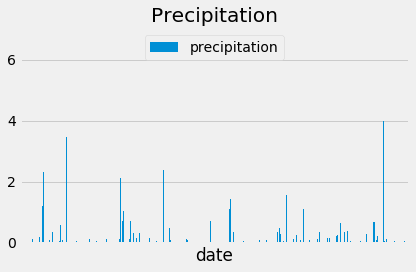

<Figure size 1440x1440 with 0 Axes>

In [149]:
#Plot the results using the DataFrame `plot` method. Pandas Plotting.
df.plot.bar(title="Precipitation")
plt.xticks([])
plt.tight_layout()
plt.figure(figsize=(20,20))
plt.show()
 

![precipitation](Images/precipitation.png)

In [139]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

## Station Analysis

In [138]:
#TOTAL NUMBER OF STATIONS
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Measurement.station).distinct().all()
len(num_stations)

9

In [150]:
#show the distinct station ID's
num_stations = session.query(Measurement.station).distinct().all()
num_stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [182]:
# Build a query to SHOW MOST ACTIVE STATIONS (descending order)
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [184]:
# # Build a query to count the distinct states values: stmt
station_count = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_count

# # Execute the query and store the scalar result: distinct_state_count
# distinct_stations_count = connection.execute(stmt).scalar()

# # Print the distinct_state_count

# station_number = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
# print(json.dumps(station_number, obj, sort_keys=2)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and the counts in descending order.


In [199]:
#count the number of rows each station shows activity in
session.query(func.count(Measurement.station == 'USC00519281'), Measurement.station).group_by(Measurement.tobs).all()

[(1, 'USC00511918'),
 (1, 'USC00519281'),
 (1, 'USC00511918'),
 (12, 'USC00519397'),
 (18, 'USC00519523'),
 (31, 'USC00519397'),
 (20, 'USC00519397'),
 (49, 'USC00519397'),
 (77, 'USC00519397'),
 (135, 'USC00519397'),
 (186, 'USC00519397'),
 (240, 'USC00519397'),
 (355, 'USC00519397'),
 (440, 'USC00519397'),
 (603, 'USC00519397'),
 (739, 'USC00519397'),
 (1103, 'USC00519397'),
 (1257, 'USC00519397'),
 (1425, 'USC00519397'),
 (1606, 'USC00519397'),
 (1654, 'USC00519397'),
 (1752, 'USC00519397'),
 (1601, 'USC00519397'),
 (1625, 'USC00519397'),
 (1375, 'USC00519397'),
 (1159, 'USC00519397'),
 (785, 'USC00519397'),
 (614, 'USC00519397'),
 (381, 'USC00519397'),
 (169, 'USC00519397'),
 (81, 'USC00519397'),
 (36, 'USC00519397'),
 (11, 'USC00519397'),
 (4, 'USC00511918'),
 (4, 'USC00519397')]

In [185]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
